In [117]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
#from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random 
import matplotlib.pyplot as plt
%matplotlib inline


In [118]:
os.chdir(r'D:\senior year\GP\datasets\ragaadataset\AFULL-CLASSES')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    #os.mkdir('valid')
    os.mkdir('test')

    for i in range(0,10): #number of classes
        shutil.move(f'{i}','train')
#         os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

#         valid_samples = random.sample(os.listdir(f'train/{i}'),100) #100 sore mnn al train to valid from every class(100*10)
#         for j in valid_samples:
#             shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'),20) #50 sora mn al train to test ly kol class
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')


In [119]:
train_path = r'D:\senior year\GP\datasets\ragaadataset\AFULL-CLASSES\train'
# valid_path = r'D:\senior year\GP\datasets\Dataset-master\valid'
test_path = r'D:\senior year\GP\datasets\ragaadataset\AFULL-CLASSES\test'

#print('total dataset is 4220 image:')
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, 
    target_size=(224,224),
    batch_size=10)

# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
#     directory=valid_path,
#     target_size=(224,224), 
#     batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    batch_size=10, 
    shuffle=False)

Found 1453 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [120]:
mobile= tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [121]:
x = mobile.layers[-6].output #hakhod al hidden layers mn mobile kolo ela akher 6
x

<tf.Tensor 'global_average_pooling2d_7/Mean:0' shape=(None, 1024) dtype=float32>

In [122]:
output =  Dense(units=10, activation ='softmax')(x)
#dense new hidden layer

In [123]:
model = Model(inputs=mobile.input, outputs=output) #new model x + dense layer

In [124]:
# for layer in model.layers[:-23]: #only train the last 23 layers in our new model
#     layer.trainable=False 

In [125]:
model.summary() #our new model (model-6 + dense)

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)    

In [126]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [127]:
history = model.fit(x=train_batches,
         steps_per_epoch=len(train_batches), #no batch size, kol epoch btakhod kol al train images
#          validation_data=valid_batches,
#          validation_steps=len(valid_batches),
         epochs=30,
         verbose=2)
#val watya acc 3alya = overfitting

Epoch 1/30
146/146 - 180s - loss: 0.5066 - accuracy: 0.8438
Epoch 2/30
146/146 - 185s - loss: 0.0573 - accuracy: 0.9897
Epoch 3/30
146/146 - 185s - loss: 0.0255 - accuracy: 0.9979
Epoch 4/30
146/146 - 186s - loss: 0.0180 - accuracy: 0.9972
Epoch 5/30
146/146 - 186s - loss: 0.0119 - accuracy: 0.9986
Epoch 6/30
146/146 - 190s - loss: 0.0094 - accuracy: 0.9986
Epoch 7/30
146/146 - 186s - loss: 0.0108 - accuracy: 0.9979
Epoch 8/30
146/146 - 187s - loss: 0.0079 - accuracy: 0.9993
Epoch 9/30
146/146 - 188s - loss: 0.0027 - accuracy: 1.0000
Epoch 10/30
146/146 - 186s - loss: 0.0153 - accuracy: 0.9952
Epoch 11/30
146/146 - 186s - loss: 0.0063 - accuracy: 0.9986
Epoch 12/30
146/146 - 187s - loss: 0.0033 - accuracy: 1.0000
Epoch 13/30
146/146 - 186s - loss: 0.0052 - accuracy: 0.9986
Epoch 14/30
146/146 - 187s - loss: 0.0040 - accuracy: 0.9993
Epoch 15/30
146/146 - 186s - loss: 0.0022 - accuracy: 1.0000
Epoch 16/30
146/146 - 187s - loss: 0.0022 - accuracy: 1.0000
Epoch 17/30
146/146 - 185s - loss

In [128]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [129]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


In [130]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
cm

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int64)

In [131]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
    #this function prints and plots the confusion matrix
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                horizontalalignment = "center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('true/real label')
    plt.xlabel('predicted label')

In [132]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

confusion matrix, without normalization
[[20  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  1  0  0  0  0  0  0]
 [ 0  0 18  0  0  2  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0 20]]


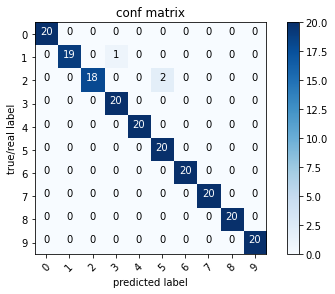

In [133]:
cm_plot_labels=['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="conf matrix")

In [134]:
# plt.plot(history.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()

In [135]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# test_x=np.array(test_samples)
# y_pred=model.predict(test_x)
# y_pred=np.argmax(y_pred,axis=1)

y_pred=predictions.argmax(axis=1)
print(classification_report(y_pred,test_batches.classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.97        19
           2       0.90      1.00      0.95        18
           3       1.00      0.95      0.98        21
           4       1.00      1.00      1.00        20
           5       1.00      0.91      0.95        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



In [136]:
#batch size
#for loop
#units